In [70]:
import pandas as pd
import numpy as np

In [71]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filepath)    # Utilize the same header list defined above

In [72]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [73]:
df.columns = headers

In [74]:
# inplace参数默认是False，即不修改原数据，而是返回一个新的DataFrame，
# 当是True的时候，就会直接修改原对象
df.replace('?', np.nan, inplace=True)

In [75]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [76]:
# 使用isnull()方法能够将DataFrame中空值的位置标记为True，非空值的位置标记为False
miss_data = df.isnull()
miss_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# 建一个DataFrame来统计缺失值
miss_data_analysis = pd.DataFrame(columns=miss_data.columns)

In [78]:
miss_data_analysis

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [79]:
# 遍历每一列，统计每一列的缺失值个数，注意直接使用miss_data.columns得到的不是列表，
# 需要使用to_list变成列表数据
# value_counts()方法能够统计Series中每个值出现的次数
for column in miss_data.columns.to_list():
    miss_data_analysis[column] = miss_data[column].value_counts()

In [80]:
miss_data_analysis

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,
False,204,164,204,204,204,202,204,204,204,204,...,204,204,200,200,204,202,202,204,204,200


In [81]:
# 输出每列的缺失值情况汇总
for column in miss_data_analysis.columns.to_list():
    if miss_data_analysis[column][0] != 204:
        print('{}: {} missing values'.format(column, 204-miss_data_analysis[column][0]))

normalized-losses: 40 missing values
num-of-doors: 2 missing values
bore: 4 missing values
stroke: 4 missing values
horsepower: 2 missing values
peak-rpm: 2 missing values
price: 4 missing values


/var/folders/rp/cc1qy8yj1qs4wb9pgxtgqxh40000gn/T/ipykernel_5028/3977821595.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if miss_data_analysis[column][0] != 204:
/var/folders/rp/cc1qy8yj1qs4wb9pgxtgqxh40000gn/T/ipykernel_5028/3977821595.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{}: {} missing values'.format(column, 204-miss_data_analysis[column][0]))


In [82]:
# 使用astype()方法，将某一列的数据类型转化为指定的类型，
# 同时使用mean()函数求取某一列的平均值
avg_normalized_losses = df['normalized-losses'].astype('float').mean()
avg_bore = df['bore'].astype('float').mean()
avg_stroke = df['stroke'].astype('float').mean()
avg_price = df['price'].astype('float').mean()
avg_horsepower = df['horsepower'].astype('float').mean()
avg_peak_rpm = df['peak-rpm'].astype('float').mean()
df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)
df['bore'].replace(np.nan, avg_bore, inplace=True)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)
df['price'].replace(np.nan, avg_price, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

In [83]:
# 使用value_counts()方法，统计某一列中每个值出现的次数，
# 使用idxmax()方法，找出某一列中出现次数最多的值
df['num-of-doors'].value_counts().idxmax()

'four'

In [84]:
df['num-of-doors'].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

In [85]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [95]:
df['city-mpg'] = 235/df['city-mpg']
df['highway-mpg'] = 235/df['highway-mpg']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500,Medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950,Low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19.0,25.0,15250,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845,Low
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045,Medium
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485,Medium
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470,Low


### 接下来，关于binning，分箱的操作，将连续的数值，离散化，便于分析
比如在horsepower这一列，将数值离散化，分成低、中、高三个等级

In [96]:
# 先将horsepower这一列的数据类型转化为int类型
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

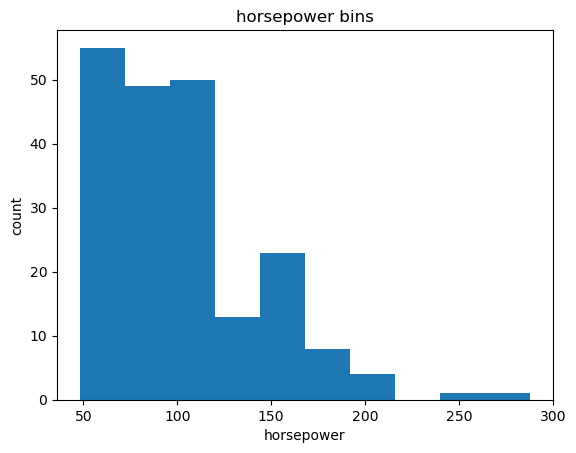

In [97]:
# 通过绘图的方式，查看horsepower这一列数据的大致分布情况
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>


In [89]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [90]:
group_names = ['Low', 'Medium', 'High']

In [99]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['make', 'horsepower','horsepower-binned']]

,make,horsepower,horsepower-binned
0,alfa-romero,111,Low
1,alfa-romero,154,Medium
2,audi,102,Low
3,audi,115,Low
4,audi,110,Low
...,...,...,...
199,volvo,114,Low
200,volvo,160,Medium
201,volvo,134,Medium
202,volvo,106,Low


In [92]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       162
Medium     40
High        2
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

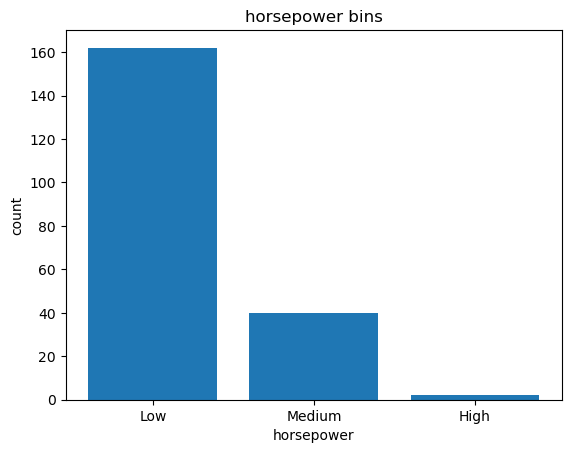

In [93]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator Variables
有一些用文本描述的数据内容，计算机无法理解，需要将文本转化为计算机能够理解的数值
例如fuel-type列，包含了燃油的类型有两种，可以将其分为两类

In [100]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower-binned'],
      dtype='object')

In [ ]:
# 创建一个dummy_variable_1的数据框，用于存储dummy变量，将其分为T/F两种类型
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1

In [104]:
# 重新创建列名
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [105]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [106]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21.0,27.0,16500,Low,False,True
1,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19.0,26.0,16500,Medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24.0,30.0,13950,Low,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18.0,22.0,17450,Low,False,True
4,2,122.0,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.40,8.5,110,5500,19.0,25.0,15250,Low,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23.0,28.0,16845,Low,False,True
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19.0,25.0,19045,Medium,False,True
201,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18.0,23.0,21485,Medium,False,True
202,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26.0,27.0,22470,Low,True,False


In [109]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis = 1, inplace=True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,111,5000,21.0,27.0,16500,Low,False,True,True,False
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,154,5000,19.0,26.0,16500,Medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,102,5500,24.0,30.0,13950,Low,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,115,5500,18.0,22.0,17450,Low,False,True,True,False
4,2,122.0,audi,two,sedan,fwd,front,99.8,177.3,66.3,...,110,5500,19.0,25.0,15250,Low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,114,5400,23.0,28.0,16845,Low,False,True,True,False
200,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.8,...,160,5300,19.0,25.0,19045,Medium,False,True,False,True
201,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,134,5500,18.0,23.0,21485,Medium,False,True,True,False
202,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,106,4800,26.0,27.0,22470,Low,True,False,False,True
